`Developing NLP and ML project:`
    
    - Collecting data
    - Understand Problem statement 
    - since it is text we need to follow NLP PipeLine
    - Developing ML Model
    - Testing model 
    - Save the model 
    - Load the model and test once again 
    - Depoly in any cloud [AWS , IBM , Google cloud , Mircosoft Azure , Heroku saleforce]
    

In [1]:
import numpy as np 
import pandas as pd 
import nltk 
from nltk.corpus import stopwords

`load the dataset and check whether important fetures are available or not:`

In [2]:
data = pd.read_csv('./spam.csv', encoding="ISO-8859-1")
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape  # Number of rows and number of columns:

(5572, 5)

`Since feature 3 , 4 , 5 having lot of Null values I am going to check the count`

In [4]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [5]:
data.columns[2:]

Index(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [6]:
for i in data.columns[2:]:
    print('Number of unique content in ',i,'is :',data[i].unique())

Number of unique content in  Unnamed: 2 is : [nan ' PO Box 5249'
 ' the person is definitely special for u..... But if the person is so special'
 ' HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE JEN XXX\\""'
 ' wanted to say hi. HI!!!\\" Stop? Send STOP to 62468"'
 'this wont even start........ Datz confidence.."' 'GN' '.;-):-D"'
 'just been in bedbut mite go 2 thepub l8tr if uwana mt up?loads a luv Jenxxx.\\""'
 ' bt not his girlfrnd... G o o d n i g h t . . .@"' ' I\'ll come up"'
 ' don\'t miss ur best life for anything... Gud nyt..."'
 ' just as a shop has to give a guarantee on what they sell. B. G."'
 ' But at d end my love compromised me for everything:-(\\".. Gud mornin:-)"'
 ' the toughest is acting Happy with all unspoken pain inside..\\""'
 ' smoke hella weed\\""' '\\" not \\"what i need to do.\\""'
 'JUST GOT PAYED2DAY & I HAVBEEN GIVEN Aå£50 PAY RISE 4MY WORK & HAVEBEEN MADE PRESCHOOLCO-ORDINATOR 2I AM FEELINGOOD LUV\\""'
 ' justthought iåÕd sayhey! how u doin?nearly the endo

In [7]:
data = data.drop(data.columns[2:] , axis = 1)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data = data.rename(columns={'v1':'target' , 'v2':'E-mails'})

In [9]:
data.head()

,target,E-mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


`let me find whether the data is balanced or not`

In [10]:
data['target'].value_counts()

ham     4825
spam     747
Name: target, dtype: int64

`It is a Imbalanced dataset but lets develop model with data what we have`

In [11]:
import matplotlib.pyplot as plt 

<Axes: xlabel='target', ylabel='count'>

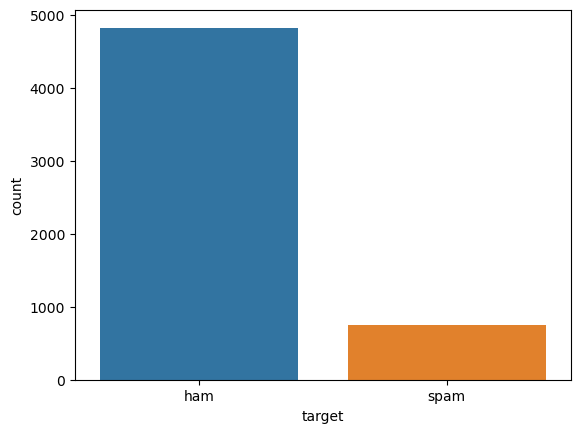

In [12]:
import seaborn as sns 
sns.countplot(x = data['target']) # countplot x , y cordinates:

In [13]:
data.head()

,target,E-mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


`There are few preprocessing techniques which gives lot of information to develop RNN Models`

#### Counting number of words in each independent data

In [14]:
data['word_count'] = data['E-mails'].apply(lambda x: len(x.split()))

In [15]:
data.head()

,target,E-mails,word_count
0,ham,"Go until jurong point, crazy.. Available only ...",20
1,ham,Ok lar... Joking wif u oni...,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,ham,U dun say so early hor... U c already then say...,11
4,ham,"Nah I don't think he goes to usf, he lives aro...",13


In [16]:
data['E-mails'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

#### character count 

In [17]:
def character_count(text):
    count = 0
    c = ''
    for i in text:
        c+=i
        count+=1
    return count

In [18]:
text = 'I am kamal'  # 10 characters:
character_count(text)

10

In [19]:
data['character_count'] = data['E-mails'].apply(lambda x: character_count(str(x)))

In [20]:
data.head()

,target,E-mails,word_count,character_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111
1,ham,Ok lar... Joking wif u oni...,6,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155
3,ham,U dun say so early hor... U c already then say...,11,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61


### Average count()

In [21]:
data['Average_count'] = data['character_count'] / data['word_count']

In [22]:
data.head()

,target,E-mails,word_count,character_count,Average_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308


#### stopwords count 

In [23]:
data['stopwords_count'] = data['E-mails'].apply(lambda x:len([i for i in x.split() if i in stopwords.words('english')]))

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Admin/nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\envs\\deep_learning\\nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\envs\\deep_learning\\share\\nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\envs\\deep_learning\\lib\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [ ]:
data.head()

#### Number count:

In [ ]:
data['Number_count'] = data['E-mails'].apply(lambda x: len([i for i in x if i.isdigit()]))

In [ ]:
data.head()

In [ ]:
data['E-mails'][2]

`Preprocess the data`

- clean the data [punctuations]
- lower text 
- remove stopwords
- Apply stemming or lematization 

In [ ]:
data['target'] = data['target'].map({'ham':0 , 'spam':1})

`In the target feature 0-> good incoming mail and 1-> Bad incoming Mail`

In [24]:
data.head()

,target,E-mails,word_count,character_count,Average_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308


`Lets solve indepedent feature:`

`regex -> is an regular expressions which is used to find patterns in the text data`


`regex : https://docs.python.org/3/library/re.html`
        

In [25]:
a = 'I am computer 230 vision scientist 35 and my mbl number is 7337513242'
c = ''
for i in a:
    if i.isnumeric():
        c+=i
print(c)

230357337513242


`In this regex d refers to numbers`

In [26]:
import re 
a = 'I am computer 230 vision scientist 35 and my mbl number is 7337513242'

sol = re.findall('\d{10}' , a)

print(sol)

['7337513242']


`Using regex I am collecting only text and numbers`

- Ex: Bring me 10 apples from the supermarket:
- Ex: Bring me apples from the supermarket: 

In [27]:
data.head()

,target,E-mails,word_count,character_count,Average_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308


`regex sub: keep what we want and removes what we dont want:`

In [28]:
a = 'I am computer 230 .&* vision scientist 35 and my mbl number is 7337513242'
sol = re.sub('[^a-zA-Z]',' ',a)
sol

'I am computer         vision scientist    and my mbl number is           '

`Applying same logic for first row:`
    

In [29]:
print(data['E-mails'][0])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


In [30]:
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
s = PorterStemmer()

In [31]:
sol = re.sub('[^a-zA-Z0-9]',' ',data['E-mails'][0])
print(sol)
sol = sol.lower()
sol = sol.split()
sol = [i for i in sol if i not in stopwords.words('english')]
sol = [s.stem(j) for j in sol]
sol = ' '.join(sol)
print()
print(sol)

Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Admin/nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\envs\\deep_learning\\nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\envs\\deep_learning\\share\\nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\envs\\deep_learning\\lib\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [32]:
data.head()

,target,E-mails,word_count,character_count,Average_count
0,ham,"Go until jurong point, crazy.. Available only ...",20,111,5.550000
1,ham,Ok lar... Joking wif u oni...,6,29,4.833333
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,155,5.535714
3,ham,U dun say so early hor... U c already then say...,11,49,4.454545
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,61,4.692308


In [33]:
# preprocessing:
clean_text = []
for i in data.index:
    sol = re.sub('[^a-zA-Z0-9]',' ',data['E-mails'][i])
    sol = sol.lower()
    sol = sol.split()
    sol = [i for i in sol if i not in stopwords.words('english')]
    sol = [s.stem(j) for j in sol]
    sol = ' '.join(sol)
    clean_text.append(sol)
    

LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\Admin/nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\envs\\deep_learning\\nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\envs\\deep_learning\\share\\nltk_data'
    - 'C:\\Users\\Admin\\anaconda3\\envs\\deep_learning\\lib\\nltk_data'
    - 'C:\\Users\\Admin\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [34]:
clean_text

[]

`On the top if raw data I applied word count , character count , stopwords count , average count , number count and preprocess the complete Now my independent var is cleaned`


`conveting text into numbers but not with tfidf Now i am using padding technique and for model development I am using RNN models`


In [76]:
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [77]:
clean_text[0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [78]:
voc_size = 1000

vectors = [one_hot(i , voc_size) for i in clean_text]

vectors

[[304, 714, 6, 52, 649, 180, 489, 153, 267, 973, 380, 914, 476, 929, 48, 107],
 [155, 647, 136, 36, 171, 719],
 [906,
  658,
  5,
  482,
  272,
  960,
  332,
  974,
  168,
  112,
  815,
  992,
  620,
  346,
  332,
  748,
  421,
  658,
  594,
  126,
  50,
  683,
  252,
  116,
  129],
 [171, 80, 934, 629, 656, 171, 252, 70, 934],
 [789, 200, 923, 210, 769, 196, 533],
 [966,
  825,
  392,
  541,
  541,
  597,
  511,
  264,
  806,
  410,
  271,
  155,
  2,
  126,
  229,
  821,
  68,
  582,
  634],
 [830, 38, 264, 589, 37, 264, 345, 723],
 [108,
  779,
  562,
  562,
  804,
  714,
  19,
  683,
  658,
  803,
  547,
  288,
  636,
  753,
  611,
  803],
 [707,
  451,
  555,
  982,
  419,
  125,
  231,
  353,
  632,
  901,
  936,
  143,
  901,
  659,
  269,
  44,
  699,
  182],
 [637,
  104,
  473,
  171,
  31,
  682,
  958,
  507,
  125,
  637,
  566,
  906,
  936,
  637,
  958,
  588,
  906,
  491],
 [285, 479, 767, 194, 518, 567, 728, 671, 304, 152, 854, 913],
 [88,
  445,
  960,
  4,
  363,
 

#### padding technique

In [79]:
c = []
for i in vectors:
    c.append(len(i))
print(c)

[16, 6, 25, 9, 7, 19, 8, 16, 18, 18, 12, 23, 20, 15, 2, 16, 3, 12, 7, 24, 3, 7, 6, 15, 5, 15, 3, 12, 7, 7, 9, 18, 3, 5, 14, 14, 5, 4, 4, 11, 9, 11, 18, 1, 9, 4, 5, 4, 8, 15, 5, 17, 10, 21, 18, 8, 23, 4, 2, 5, 10, 8, 3, 6, 18, 14, 13, 23, 7, 4, 6, 2, 7, 3, 2, 4, 6, 5, 3, 6, 3, 3, 5, 2, 3, 5, 13, 16, 4, 8, 6, 17, 21, 15, 16, 14, 6, 5, 21, 6, 13, 9, 16, 19, 7, 9, 4, 8, 12, 4, 3, 3, 17, 18, 18, 17, 19, 10, 9, 17, 19, 5, 20, 6, 5, 2, 17, 1, 19, 4, 1, 5, 3, 20, 28, 5, 2, 4, 20, 11, 3, 3, 20, 4, 4, 6, 19, 9, 3, 5, 3, 11, 4, 16, 35, 2, 2, 10, 12, 18, 10, 7, 6, 22, 22, 7, 17, 9, 8, 7, 7, 17, 3, 13, 7, 7, 4, 17, 6, 12, 14, 3, 5, 2, 4, 13, 3, 16, 5, 13, 9, 18, 4, 10, 8, 6, 4, 8, 13, 4, 4, 12, 20, 3, 5, 10, 17, 5, 10, 5, 6, 3, 5, 3, 3, 6, 5, 7, 4, 13, 5, 17, 3, 19, 20, 7, 24, 5, 19, 3, 15, 4, 4, 6, 25, 6, 7, 2, 16, 17, 6, 6, 6, 24, 4, 5, 3, 5, 14, 21, 7, 27, 0, 18, 4, 7, 6, 2, 16, 6, 1, 11, 6, 17, 3, 4, 6, 24, 4, 15, 5, 18, 21, 7, 3, 1, 5, 3, 4, 6, 3, 4, 4, 1, 14, 7, 1, 20, 14, 20, 5, 9, 4, 2, 5, 

In [80]:
print(max(c))

78


In [81]:
sent_length = 78

pad_vectors = pad_sequences(vectors , maxlen=sent_length, padding='post')
pad_vectors

array([[304, 714,   6, ...,   0,   0,   0],
       [155, 647, 136, ...,   0,   0,   0],
       [906, 658,   5, ...,   0,   0,   0],
       ...,
       [179, 372, 105, ...,   0,   0,   0],
       [783, 536, 529, ...,   0,   0,   0],
       [494, 507, 830, ...,   0,   0,   0]])

In [82]:
#### Independent data 
pad_vectors

array([[304, 714,   6, ...,   0,   0,   0],
       [155, 647, 136, ...,   0,   0,   0],
       [906, 658,   5, ...,   0,   0,   0],
       ...,
       [179, 372, 105, ...,   0,   0,   0],
       [783, 536, 529, ...,   0,   0,   0],
       [494, 507, 830, ...,   0,   0,   0]])

In [83]:
### dependent data
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: target, Length: 5572, dtype: int64

In [84]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding,LSTM,Activation,Bidirectional,GRU
from tensorflow.keras.activations import sigmoid,relu,tanh,softmax


In [85]:
model = Sequential()

model.add(Embedding(voc_size , 10 , input_length=sent_length))  # Embedded layer:
model.add(GRU(100))
model.add(Dense(1, activation='sigmoid'))


In [86]:
model.compile(optimizer='adam' , loss='binary_crossentropy',metrics=['Acc'])


In [88]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 78, 10)            10000     
                                                                 
 gru (GRU)                   (None, 100)               33600     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 43,701
Trainable params: 43,701
Non-trainable params: 0
_________________________________________________________________


In [93]:
X = np.array(pad_vectors)
y = np.array(data['target'])

In [94]:
from sklearn.model_selection import train_test_split


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [96]:
len(X_train)

3733

In [97]:
model.fit(X_train , y_train , batch_size=32 ,epochs=20)

Epoch 1/20
117/117 [==============================] - 6s 31ms/step - loss: 0.4171 - Acc: 0.8620
Epoch 2/20
117/117 [==============================] - 4s 31ms/step - loss: 0.3973 - Acc: 0.8674
Epoch 3/20
117/117 [==============================] - 4s 32ms/step - loss: 0.3952 - Acc: 0.8674
Epoch 4/20
117/117 [==============================] - 4s 32ms/step - loss: 0.3928 - Acc: 0.8674
Epoch 5/20
117/117 [==============================] - 4s 32ms/step - loss: 0.3928 - Acc: 0.8674
Epoch 6/20
117/117 [==============================] - 4s 31ms/step - loss: 0.3932 - Acc: 0.8674
Epoch 7/20
117/117 [==============================] - 4s 33ms/step - loss: 0.3927 - Acc: 0.8674
Epoch 8/20
117/117 [==============================] - 4s 34ms/step - loss: 0.3954 - Acc: 0.8674
Epoch 9/20
117/117 [==============================] - 4s 33ms/step - loss: 0.3943 - Acc: 0.8674
Epoch 10/20
117/117 [==============================] - 4s 32ms/step - loss: 0.3919 - Acc: 0.8674
Epoch 11/20
117/117 [==================

In [98]:
## test validation report:


In [99]:
y_test_pred = model.predict(X_test)

y_test_pred

58/58 [==============================] - 1s 12ms/step


array([[0.14003892],
       [0.14003892],
       [0.14003892],
       ...,
       [0.14003892],
       [0.14003892],
       [0.14003892]], dtype=float32)

In [100]:
c = []
for i in y_test_pred:
    if i > 0.5:
        c.append(1)
    else:
        c.append(0)

In [101]:
c

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [102]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [103]:
accuracy_score(y_test,c)

0.8629690048939641

In [104]:
confusion_matrix(y_test, c)

array([[1587,    0],
       [ 252,    0]], dtype=int64)

In [105]:
print(classification_report(y_test , c))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93      1587
           1       0.00      0.00      0.00       252

    accuracy                           0.86      1839
   macro avg       0.43      0.50      0.46      1839
weighted avg       0.74      0.86      0.80      1839



C:\Users\korla\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\korla\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\korla\anaconda3\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Working with real data :

In [106]:
a = ['the discount is 20% in this offer pls buy it']
c = []
sol = re.sub('[^a-zA-Z0-9]',' ',a[0])
sol = sol.lower()
sol = sol.split()
sol = [i for i in sol if i not in stopwords.words('english')]
sol = [s.stem(j) for j in sol]
c.append(' '.join(sol))
print(sol)
print(c)
ve = [one_hot(i,voc_size) for i in c]
print(ve)
sent_length = 78
pad_vectors = pad_sequences(ve , maxlen=sent_length, padding='post')
print(pad_vectors)
if model.predict(pad_vectors) > 0.5:
    print('Spam mail')
else:
    print('Ham mail')
    

['discount', '20', 'offer', 'pl', 'buy']
['discount 20 offer pl buy']
[[706, 448, 816, 450, 740]]
[[706 448 816 450 740   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0]]
1/1 [==============================] - 0s 25ms/step
Ham mail
